In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import validate_case

In [2]:
case = "smyle.control.perlmutter.004"

In [3]:
# Parameters
case = "smyle.oae-map.North_Pacific_basin.070.1999-10-01.001"


In [4]:
%%time
ds_o = xr.open_zarr(validate_case.zarr_validation_data(case)).compute()
ds_o

CPU times: user 406 ms, sys: 277 ms, total: 683 ms
Wall time: 836 ms


<xarray.Dataset> Size: 987kB
Dimensions:           (nlat: 384, nlon: 320, time: 180)
Coordinates:
    TLAT              float64 8B -79.22
    TLONG             float64 8B 320.6
    ULAT              float64 8B -78.95
    ULONG             float64 8B 321.1
  * time              (time) object 1kB 0347-11-01 00:00:00 ... 0362-10-01 00...
    z_t               float32 4B 500.0
Dimensions without coordinates: nlat, nlon
Data variables:
    ALK_ALT_CO2_diff  (nlat, nlon) float32 492kB nan nan nan nan ... nan nan nan
    ALK_ALT_CO2_rmse  (time) float64 1kB 0.01481 0.03095 ... 0.1045 0.07031
    DIC_ALT_CO2_diff  (nlat, nlon) float32 492kB nan nan nan nan ... nan nan nan
    DIC_ALT_CO2_rmse  (time) float64 1kB 0.02445 0.06785 0.112 ... 0.1394 0.1246

In [5]:
variables = [v[:-5] for v in ds_o.variables if "_rmse" in v]

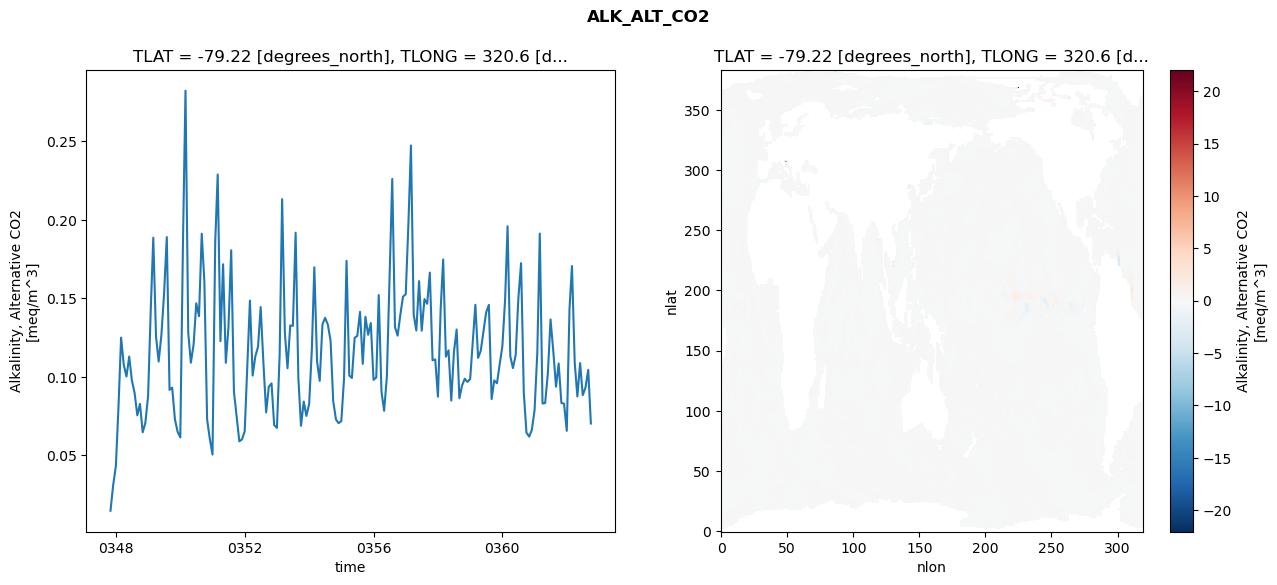

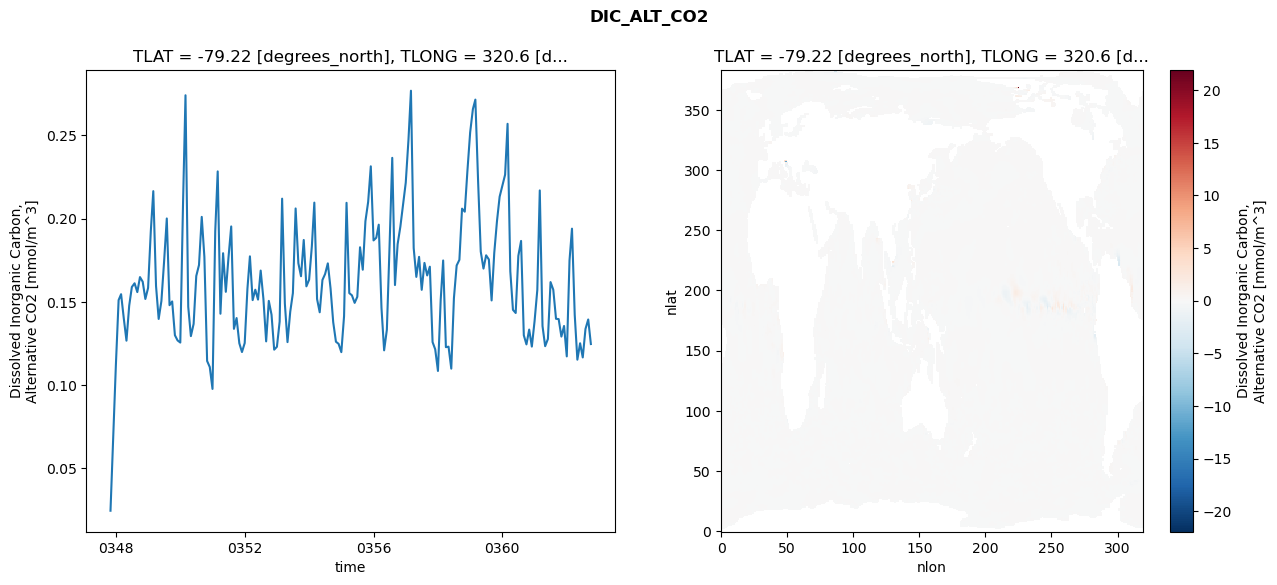

In [6]:
plt.rcParams.update({'figure.max_open_warning': 0})

for v in variables:
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    ds_o[f"{v}_rmse"].plot(ax=axs[0])   
    ds_o[f"{v}_diff"].plot(ax=axs[1])
    plt.suptitle(v, fontweight="bold")